<a href="https://colab.research.google.com/github/Vijay14501/Hotel-Booking-Analysis/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking Analysis**

**Project Type - EDA**

**Contribution - INDIVIDIUAL**

**GitHub Link -**https://github.com/Vijay14501/Hotel-Booking-Analysis.git

**Problem Summary**

• We are provided with hotel bookings dataset of the following years - 2015 to 2017

• This dataset is unstructured, contains a lot of null values and needs cleansing.


• Other than that, there are going to be certain data columns that we won't be needing so filtering is required.

• After proper Filtering and cleansing, We are going to analyse this dataset and try to gain insight and analyse factors that govern these bookings.

• We will be using some libraries such as Numpy, Pandas and Matplotlib for different task such as managing arrays, working on dataframes and visualizing data.

• We will be using data visualization to depict everything graphically.

**Problem statement -**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.

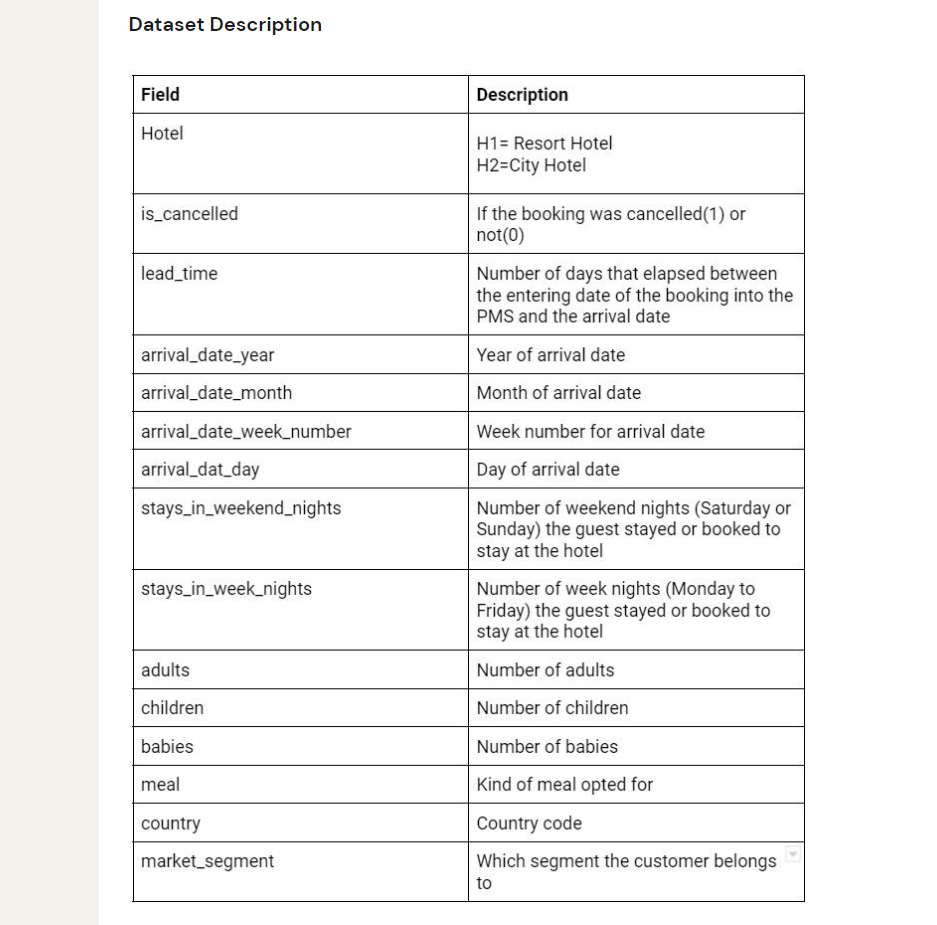

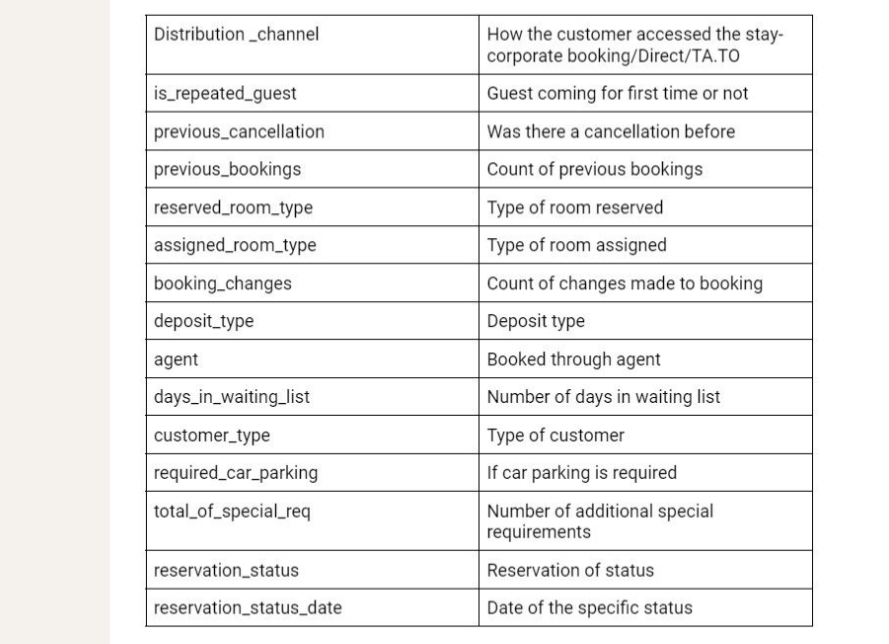

Main Libraries to be used:

• Pandas for data manipulation, aggregation

• Matplotlib and Seaborn for visualisation and behaviour with respect to the target variable. Use at least 5 different visualisations.

• NumPy for computationally efficient operations


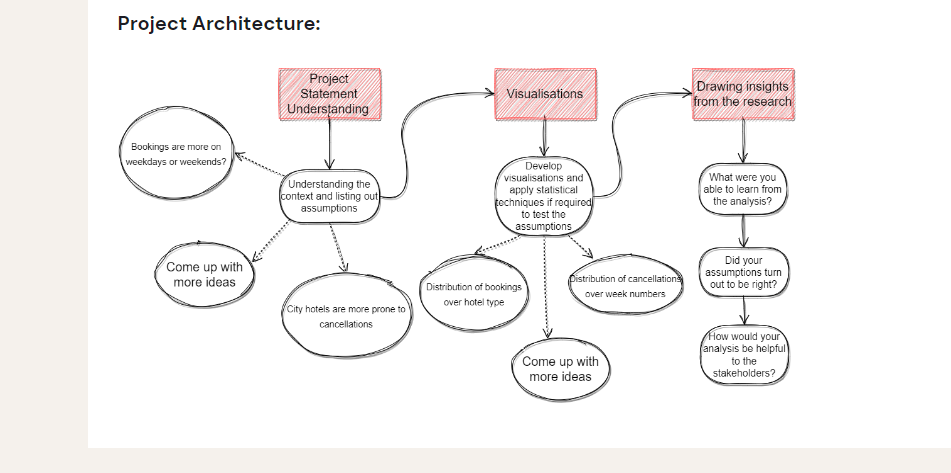

 **Importing libraries and Importing Drive**


In [73]:
#importing libraries-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [75]:
#importing dataset
hoteldata = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

In [76]:
""" Visualize the Numerical Features """
def visualize_num_feature(df):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.subplot(1,2,2)
    sns.distplot(df, bins=20)
    plt.show()

""" Use IQR rule to identify potential outliers"""
def stat_summary(df):
    stat =  df.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))

**Overview of the dataset-**

In [77]:
#Data Exploration(Total rows and columns count)-

print(f"In the given Hotel Booking Dataset have {hoteldata.shape[0]} Rows and {hoteldata.shape[1]} Columns.")

In the given Hotel Booking Dataset have 119390 Rows and 32 Columns.


In [78]:
# Top 5 rows
hoteldata.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [79]:
# Last 5 rows
hoteldata.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


In [80]:
#Calculate the basic statical data-
hoteldata.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [81]:
# Name of the total Columns-
list(hoteldata.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [82]:
#Prints number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column-
hoteldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [83]:
#Check all columns data types-
hoteldata.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**For Checking Unique Contents**

In [84]:
hoteldata['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [85]:
hoteldata['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [86]:
hoteldata['is_canceled'].unique()

array([0, 1])

In [87]:
hoteldata['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [88]:
hoteldata['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [89]:
hoteldata['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [90]:
hoteldata['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

**Now, we'll perform a quick check for missing/Null values**

In [91]:
#check for missing values
hoteldata.isna().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<Axes: >

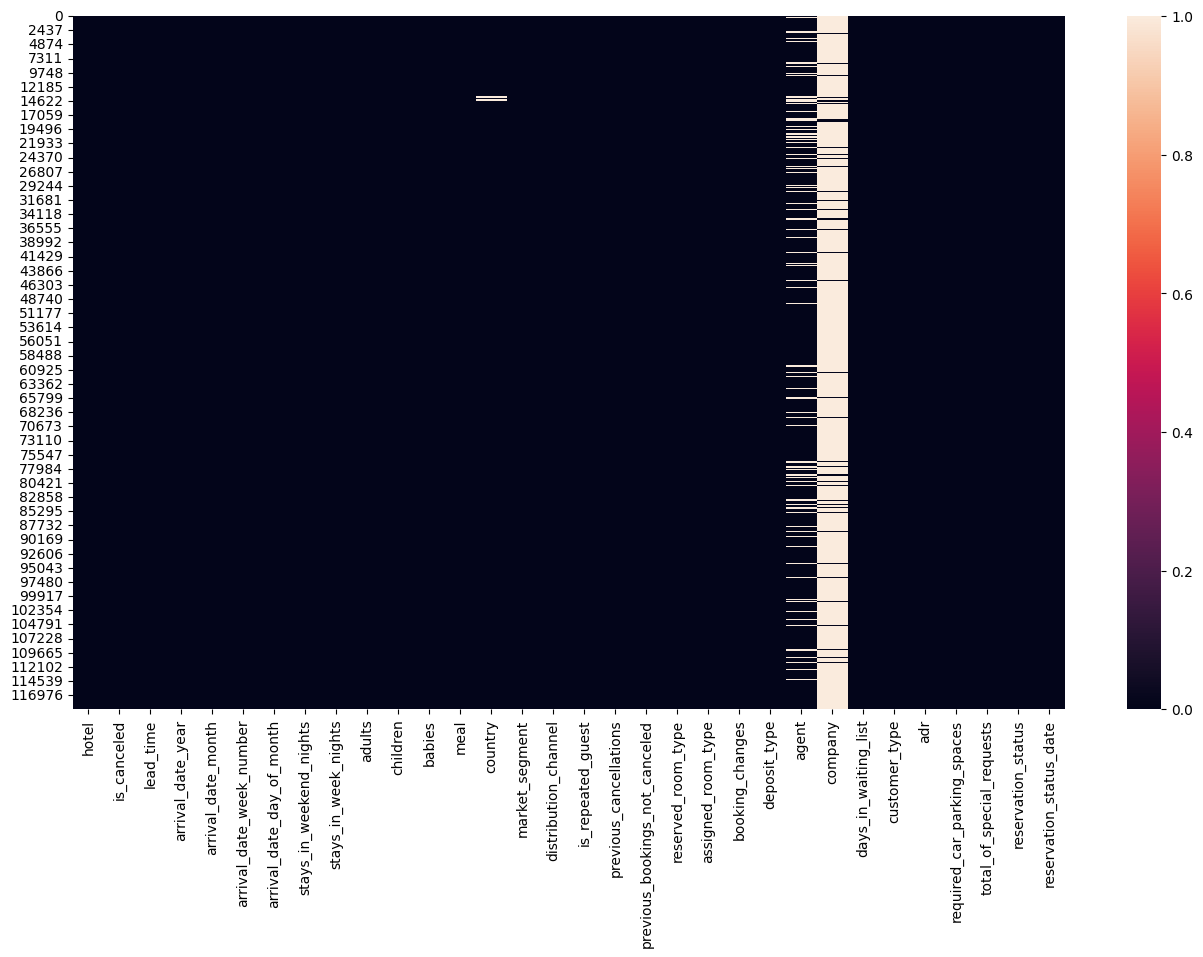

In [92]:
# visualize missing value using heatmap to get idea where is the value missing
plt.figure(figsize=(16,9))
sns.heatmap(hoteldata.isnull())

**Since, we can see agent, company and country are having most null values, we'll check what's in them**

In [95]:
#checking contents of agent column
agentlist = hoteldata['agent'].tolist()
list(agentlist)

[nan,
 nan,
 nan,
 304.0,
 240.0,
 240.0,
 nan,
 303.0,
 240.0,
 15.0,
 240.0,
 240.0,
 240.0,
 241.0,
 241.0,
 240.0,
 8.0,
 240.0,
 nan,
 250.0,
 241.0,
 250.0,
 250.0,
 250.0,
 115.0,
 5.0,
 8.0,
 240.0,
 240.0,
 240.0,
 nan,
 241.0,
 nan,
 175.0,
 241.0,
 241.0,
 240.0,
 241.0,
 241.0,
 250.0,
 241.0,
 8.0,
 nan,
 250.0,
 240.0,
 240.0,
 134.0,
 156.0,
 243.0,
 241.0,
 156.0,
 156.0,
 243.0,
 240.0,
 240.0,
 nan,
 nan,
 240.0,
 nan,
 242.0,
 241.0,
 240.0,
 250.0,
 115.0,
 240.0,
 240.0,
 240.0,
 242.0,
 242.0,
 240.0,
 240.0,
 240.0,
 3.0,
 240.0,
 242.0,
 240.0,
 240.0,
 240.0,
 105.0,
 5.0,
 40.0,
 40.0,
 40.0,
 250.0,
 115.0,
 40.0,
 241.0,
 242.0,
 240.0,
 240.0,
 240.0,
 240.0,
 241.0,
 240.0,
 240.0,
 240.0,
 242.0,
 105.0,
 240.0,
 250.0,
 250.0,
 8.0,
 241.0,
 240.0,
 240.0,
 240.0,
 250.0,
 240.0,
 134.0,
 240.0,
 240.0,
 240.0,
 147.0,
 241.0,
 240.0,
 240.0,
 40.0,
 40.0,
 250.0,
 240.0,
 8.0,
 240.0,
 250.0,
 240.0,
 240.0,
 nan,
 240.0,
 240.0,
 240.0,
 240.0,
 240.0,

In [97]:
#checking contents of company column
companylist = hoteldata['company'].tolist()
list(companylist)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 110.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 n

In [98]:
#checking contents of country column
countrylist = hoteldata['country'].tolist()
list(countrylist)

['PRT',
 'PRT',
 'GBR',
 'GBR',
 'GBR',
 'GBR',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'USA',
 'ESP',
 'PRT',
 'IRL',
 'PRT',
 'IRL',
 'FRA',
 'GBR',
 'GBR',
 'PRT',
 'PRT',
 'PRT',
 'GBR',
 'PRT',
 'IRL',
 'PRT',
 'PRT',
 'PRT',
 nan,
 'GBR',
 'PRT',
 'IRL',
 'PRT',
 'PRT',
 'ESP',
 'PRT',
 'PRT',
 'ROU',
 'PRT',
 'IRL',
 'ESP',
 'ROU',
 'PRT',
 'PRT',
 'ESP',
 'NOR',
 'GBR',
 'IRL',
 'NOR',
 'IRL',
 'OMN',
 'ESP',
 'ARG',
 'ESP',
 'PRT',
 'PRT',
 'PRT',
 'USA',
 'PRT',
 'IRL',
 'ESP',
 'IRL',
 'PRT',
 'USA',
 'ESP',
 'POL',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'ESP',
 'PRT',
 'ESP',
 'PRT',
 'PRT',
 'DEU',
 'PRT',
 'FRA',
 'PRT',
 'GBR',
 'PRT',
 'GBR',
 'GBR',
 'GBR',
 'PRT',
 'GBR',
 'PRT',
 'ESP',
 'PRT',
 'USA',
 'BEL',
 'PRT',
 'PRT',
 'PRT',
 'ESP',
 'PRT',
 'DEU',
 'ESP',
 'FRA',
 'FRA',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'CHE',
 'PRT',
 'GBR',
 'PRT',
 'PRT',
 'PRT',
 'GBR',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 'PRT',
 '

**From the above data, it is clear that we won't be requiring agent and company data but we need country data and NULL values within it needs to be taken care of ,So we'll be doing proper CLEANSING of data.**


**so we will remove agent and company data.**

In [99]:
hoteldata= hoteldata.drop(columns=['agent', 'company'])
print(hoteldata.isna().sum(axis=0))

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [100]:
# converting all the null values to 0 for proper analysis
df = hoteldata.fillna(0)

In [101]:
# how many null values left(will be depicted by 0)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [102]:
# in country column, we need to replace zeros with something more adequate
hoteldata.country = hoteldata.country.replace(0, "not mentioned")

**NOW WE HAVE CLEAN DATA FOR PROPER EDA**

**Univariate Analysis :**


Univariate analysis is a statistical and data analysis technique that involves the examination and interpretation of a single variable in isolation. In other words, it focuses on understanding the characteristics and distribution of a single variable within a dataset

**What type of hotels do guests prefer the most**

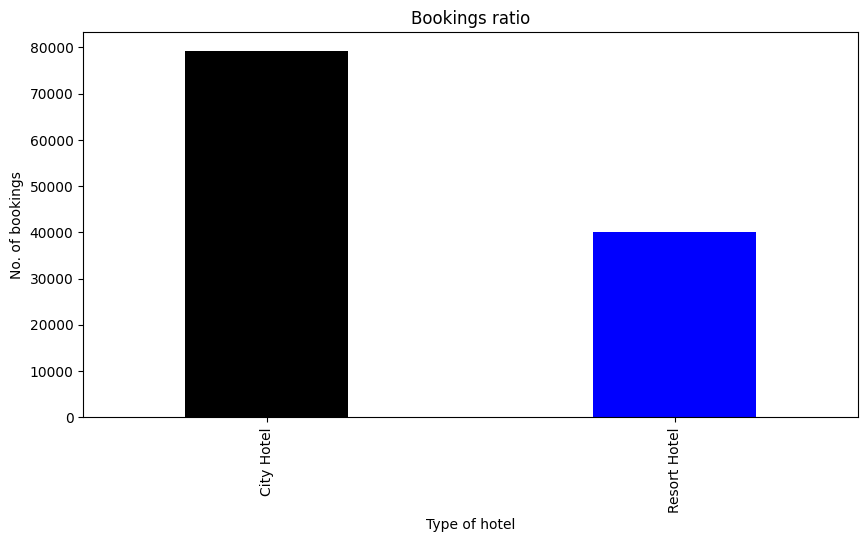

In [103]:
#bookings statistics of both hotels.

df=hoteldata['hotel'].value_counts()
df.plot(kind='bar',width=.4 ,color=['black','blue'],figsize = (10, 5))
plt.xlabel("Type of hotel")
plt.ylabel("No. of bookings")
plt.title("Bookings ratio")
plt.show()

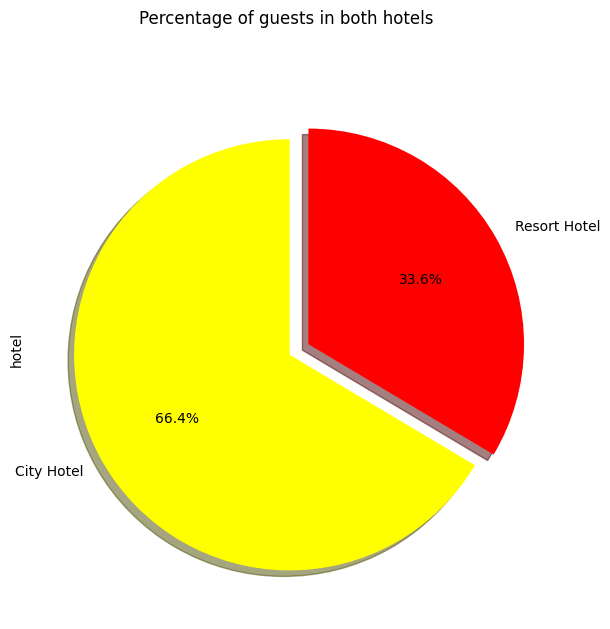

In [29]:
#Visualizng by the Pie Chart.

dff=hoteldata['hotel'].value_counts()
diagram=dff.plot(kind='pie',explode=[0.05,0.05],subplots=True, shadow = True,startangle=90,figsize=(10,7), autopct='%1.1f%%', colors = ['yellow', 'red'],title = 'Percentage of guests in both hotels' )

**Observation**


City Hotel is most preferred hotel by guests. Thus city hotels has maximum bookings.

**Adults traveling with kids or without kids**

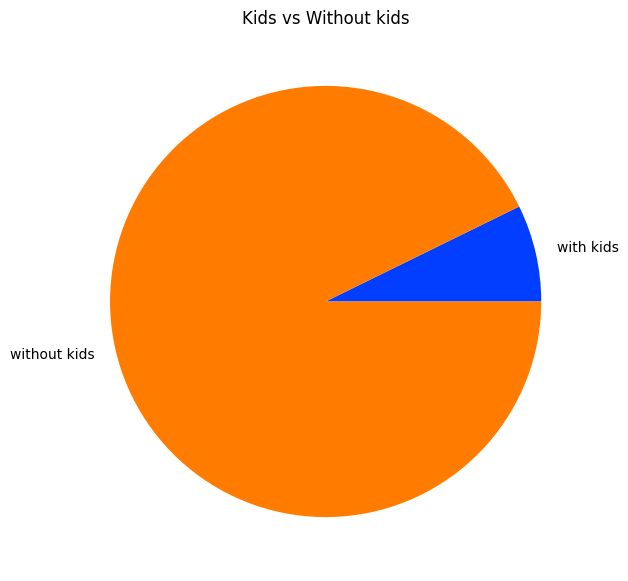

In [30]:
#Visualizng by the Pie Chart.
hoteldata['children'].value_counts
x = ["with kids", "without kids"]
y = [hoteldata[(hoteldata.children != 0) | (hoteldata.babies != 0)]["adults"].count(), hoteldata[(hoteldata.children == 0) | (hoteldata.babies == 0)]["adults"].count()]

fig = plt.figure(figsize =(10, 7))
colors = sns.color_palette('bright')
plt.pie(y, labels = x, colors = colors)
plt.title("Kids vs Without kids")
plt.show()

**Observation**


The Guests visit in the hotel without kids is more than with kids.

**Which booking platforms or channels do customers most commonly use to reserve hotels**

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

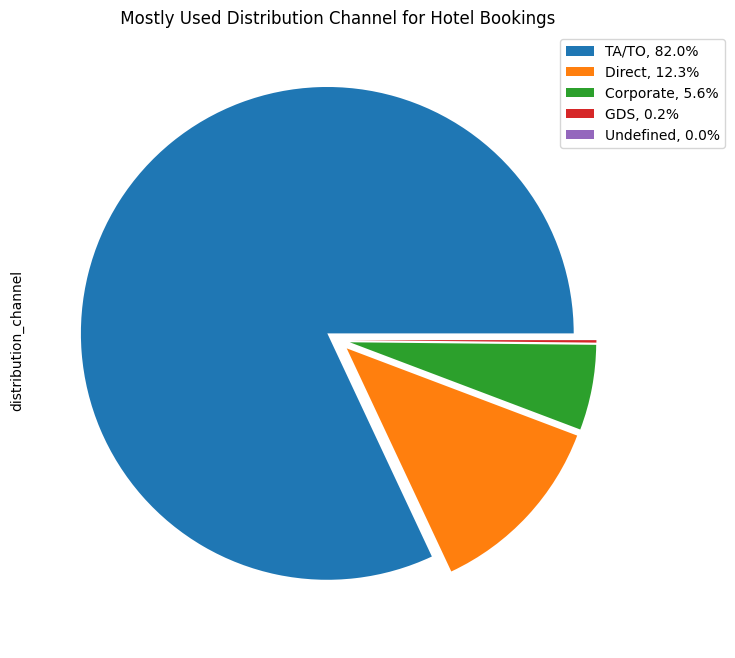

In [31]:
# Visualizsing the by pie chart.

#Creating labels.
labels=hoteldata['distribution_channel'].value_counts().index.tolist()

# creating new df of distribution channel.
distribution_channel_df=hoteldata['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

#adding percentage columns to the distribution_channel_df.
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/hoteldata.shape[0],1)

#Creating list of percentage.
sizes=distribution_channel_df['percentage'].values.tolist()

#plotting the pie chart.
hoteldata['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)

# setting legends with the percentage values.
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

**Observation**


'TA/TO' is mostly(82.2%) used for booking hoetls.

**What percentage of bookings were canceled**

In [32]:
#check how many bookings were cancelled.
hoteldata['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Cancellation and non Cancellation')

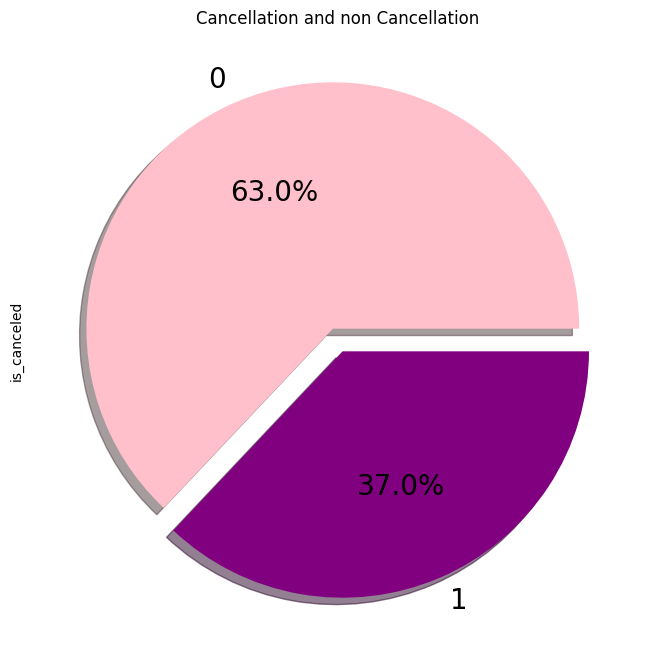

In [33]:
#Visualizing the percentage of cancellation and non cancellation by the pie chart.

hoteldata['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%',colors=('pink','purple'), shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

**Observation**

0= not canceled

1= canceled

37 % of the bookings were cancelled.

**Which hotel experiences a greater rate of booking cancellations**

In [34]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = hoteldata[hoteldata['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = hoteldata.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)

              total_cancelled_bookings  total_bookings  cancel_%
hotel                                                           
City Hotel                       33102           79330     41.73
Resort Hotel                     11122           40060     27.76


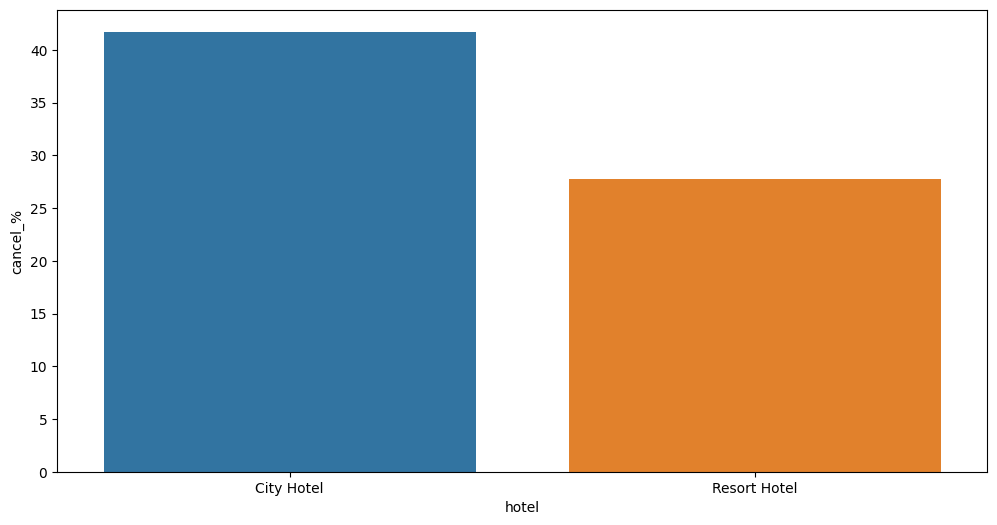

In [35]:
plt.figure(figsize = (12,6))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

**Observation**


City Hotel=41.73

Resort Hotel=27.76

From above observation it is clear that Resort Hotel has higher Cancellation Rate.

**6] What is the percentage distribution of "Customer Type"?**

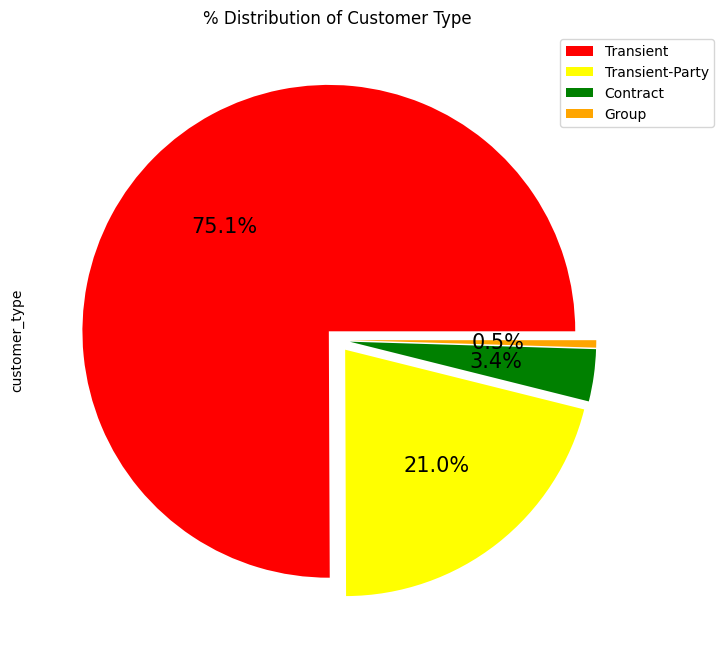

In [36]:
hoteldata['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=False,autopct='%1.1f%%',colors=('red','yellow','green','orange'),figsize=(12,8),fontsize=15,labels=None)


labels=hoteldata['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**Observation**

Transient customer type is more which is 75 %.

Percentage of Booking associated by the Group is vey low.

Repeated guests are very few which only 3.2 %.

**In order to retained the guests management should take feedbacks from guests and try to imporve the services.**

**What is the percentage breakdown of the need for car parking spaces**

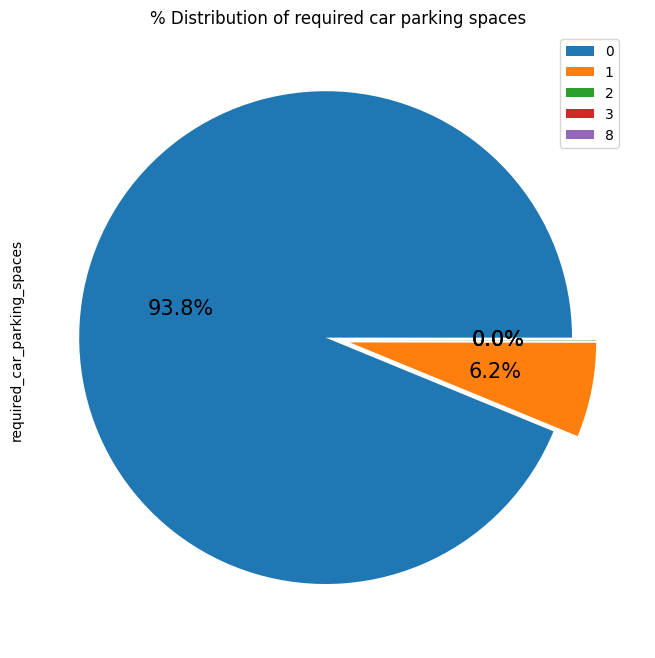

In [37]:
hoteldata['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5,autopct='%1.1f%%',shadow=False,figsize=(15,8),fontsize=15,labels=None)

labels=hoteldata['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**Observation**


93.9 % guests do not require parking space. only 6.1 % guests require only 1 parking space.

 **What percentage of reservations are modified by customers**

Text(0, 0.5, 'Percentage(%)')

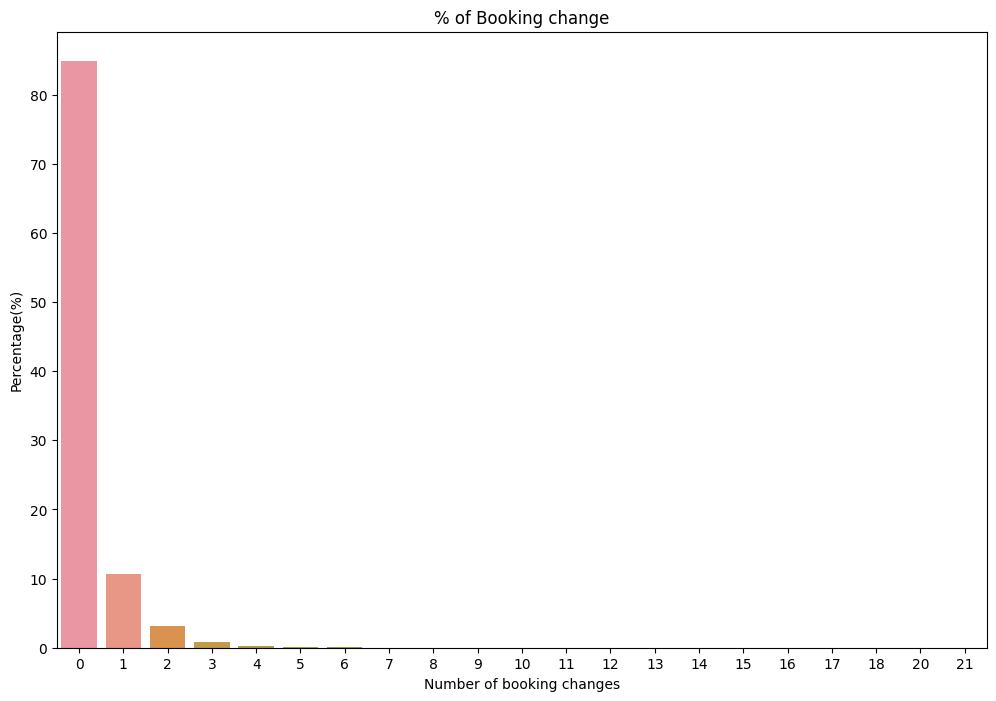

In [38]:
booking_changes_df=hoteldata['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/hoteldata.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

0= 0 changes made in the booking

1= 1 changes made in the booking

2= 2 changes made in the booking

 **Observation**

Almost 82% of the bookings were not changed by guests.

**Which type of food is mostly preferred by the guests**

Text(0.5, 1.0, 'Preferred Meal Type')

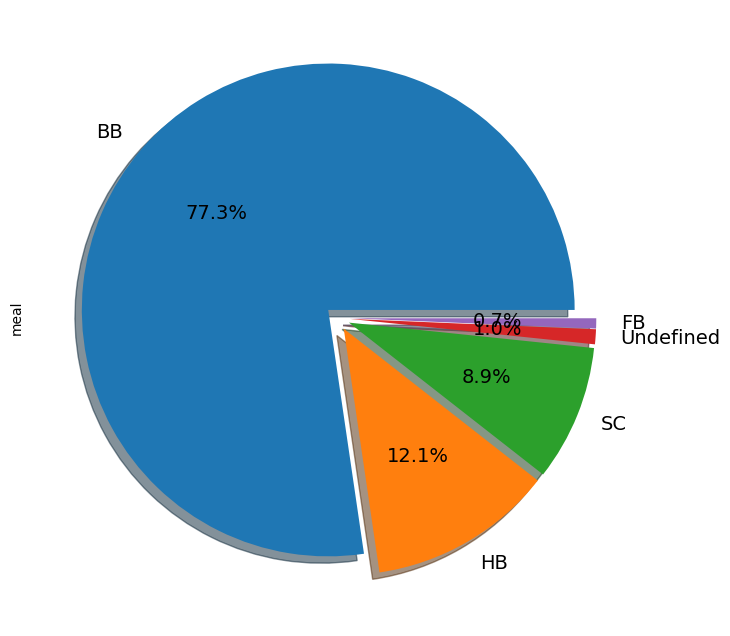

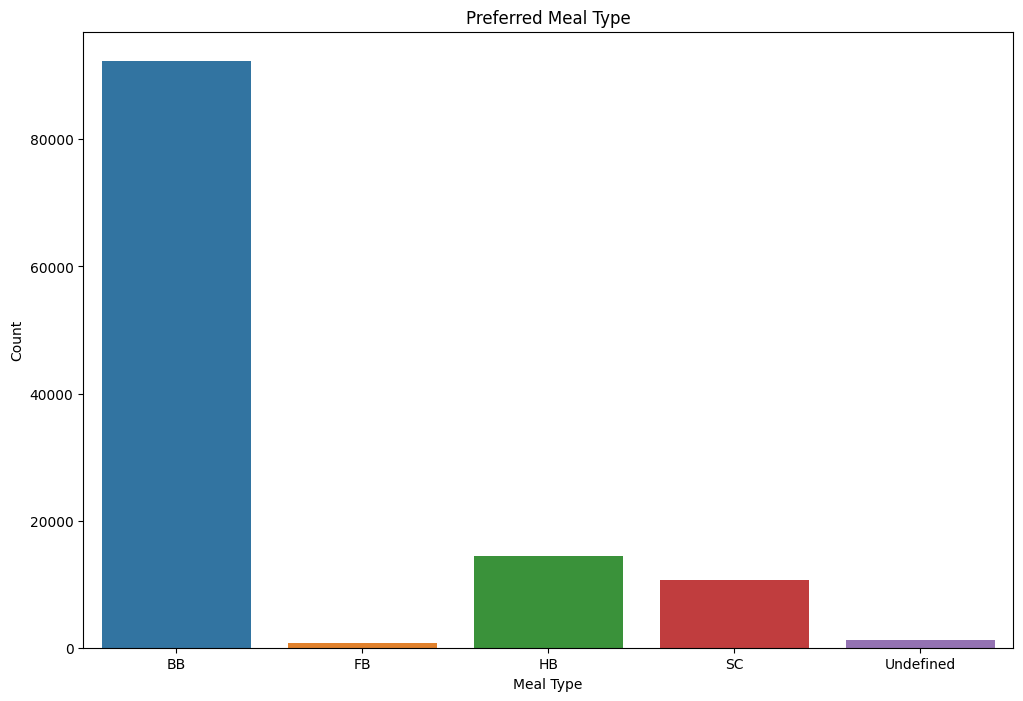

In [39]:
hoteldata['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(15,8),fontsize=14)
plt.figure(figsize=(12,8))
sns.countplot(x=hoteldata['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

**Types of meal in hotels:**

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)


**Observation**

So the most preferred meal type by the guests is BB( Bed and Breakfast)


**From which country the most guests are coming**

Text(0.5, 1.0, 'Number of guests from Given Countries')

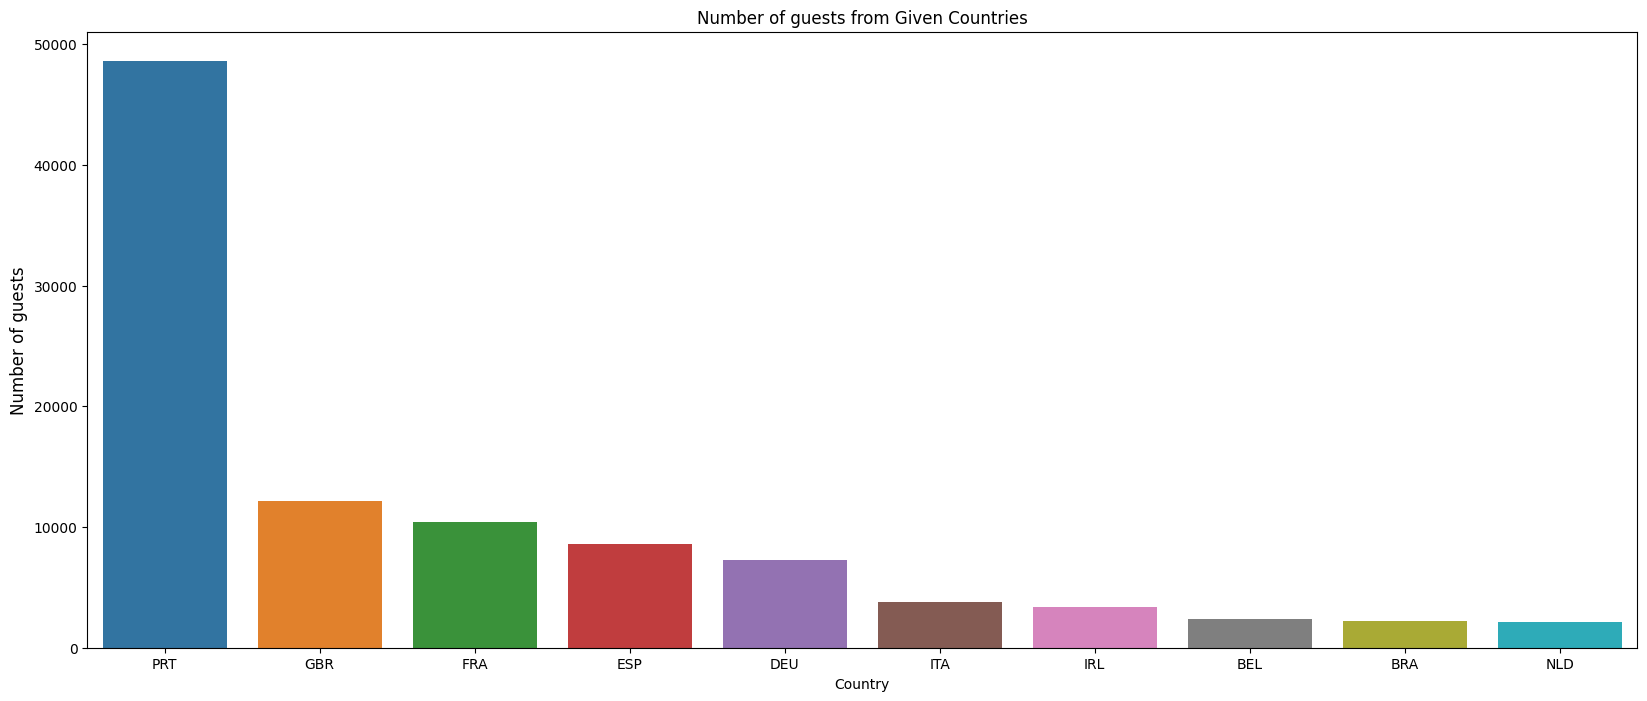

In [40]:
# Counting the guests from all given countries.

country=hoteldata['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
# Visualizing by  plotting the graph.

plt.figure(figsize=(20,8))
sns.barplot(x=country['country'],y=country['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from Given Countries")

 **Observation**

Most of the guests are coming from portugal i.e 4800 guests are from portugal.
abbreevations for countries-

1.PRT- Portugal

2.GBR- United Kingdom

3.FRA- France

4.ESP- Spain

5.DEU - Germany

6.ITA -Itlay

7.IRL - Ireland

8.BEL -Belgium

9.BRA -Brazil

10.NLD-Netherlands

 **Bivariate Analysis:**


Bivariate analysis is a statistical method used in data analysis and research to explore and understand the relationships between two different variables. It primarily focuses on examining how changes in one variable are associated with changes in another variable.

**In which month most of the booking happened**

In [41]:
# groupby arrival_date_month and taking the hotel count.
counts_per_month=hoteldata.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})

# sorting by arrival_date_month.
counts_per_month=counts_per_month.sort_values('arrival_date_month')
counts_per_month

,arrival_date_month,Counts
0,April,11089
1,August,13877
2,December,6780
3,February,8068
4,January,5929
5,July,12661
6,June,10939
7,March,9794
8,May,11791
9,November,6794


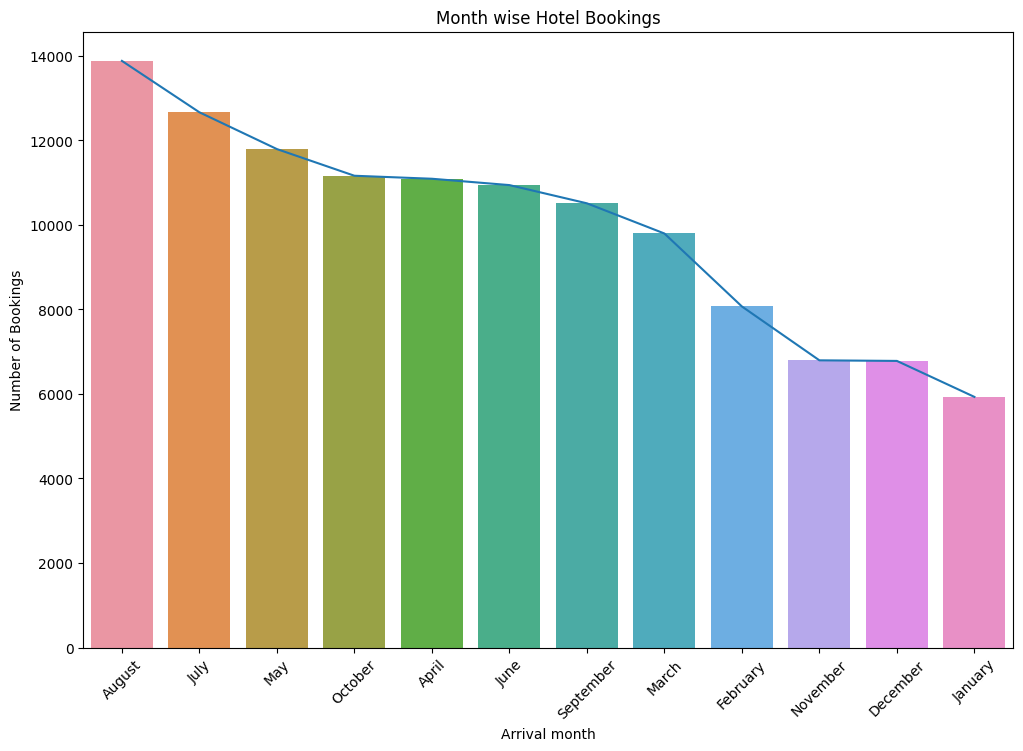

In [42]:
#Plot month wise Hotel bookings.

plt.figure(figsize=(12,8))
sns.lineplot(x=hoteldata['arrival_date_month'].value_counts().keys(),y=hoteldata['arrival_date_month'].value_counts())
sns.barplot(x=hoteldata['arrival_date_month'].value_counts().keys(),y=hoteldata['arrival_date_month'].value_counts())
plt.xticks(rotation=45)
plt.xlabel('Arrival month')
plt.ylabel('Number of Bookings')
plt.title('Month wise Hotel Bookings');

**Observation**

August month has the highest number of Bookings.



**Which year and hotel had the highest bookings**

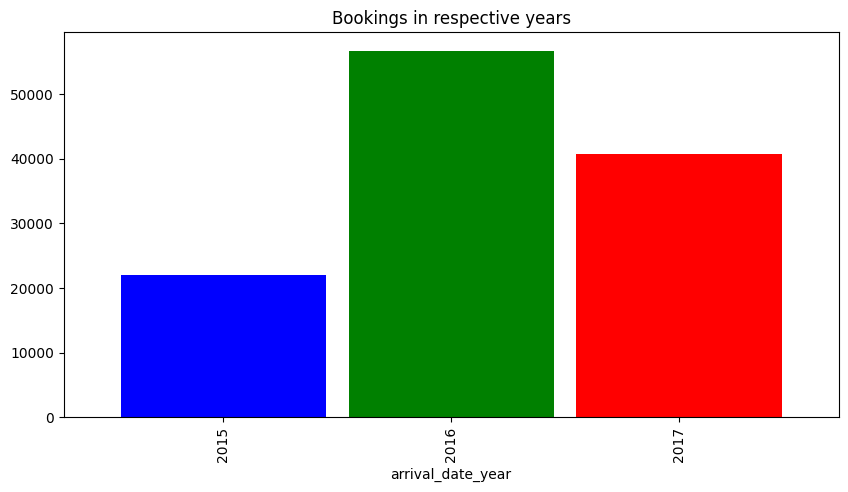

In [43]:
#Bookings yearwise statistics

total_hotel_booking=hoteldata.groupby('arrival_date_year')['hotel'].count()
total_hotel_booking
diagram=total_hotel_booking.plot(kind='bar', width=0.9 ,color=['b','g','r','c','m','y','k'],figsize=(10,5), title = 'Bookings in respective years')

Text(0.5, 1.0, 'Year Wise bookings')

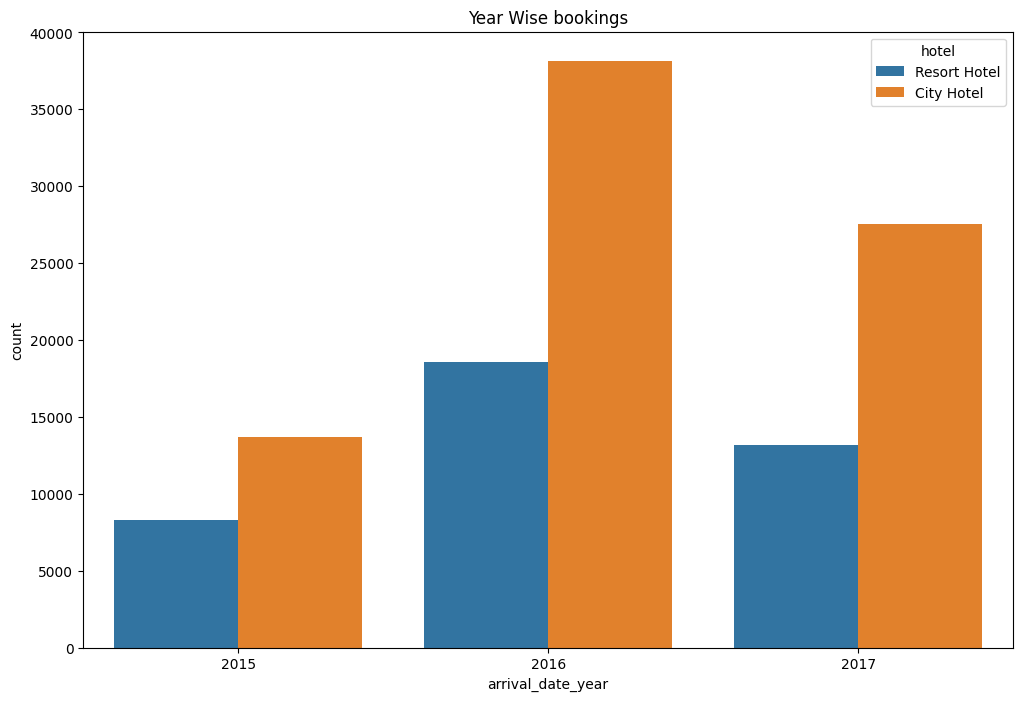

In [44]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=hoteldata['arrival_date_year'],hue=hoteldata['hotel'])
plt.title("Year Wise bookings")

 **Observation**

2016 had the higest bookings.

2015 had the lowest bookings.

overall City hotels had the most of the bookings.

**Which has a greater number of stays, weekdays or weekends**

In [45]:
#To find number of stays in week nights and weekend nights.

week_and_weekend_stay=hoteldata[['stays_in_weekend_nights','stays_in_week_nights']].sum().reset_index().rename(columns={'index':'time of week',0:'stays'})
week_and_weekend_stay

,time of week,stays
0,stays_in_weekend_nights,110746
1,stays_in_week_nights,298511


Text(0.5, 0, 'Nights of stay')

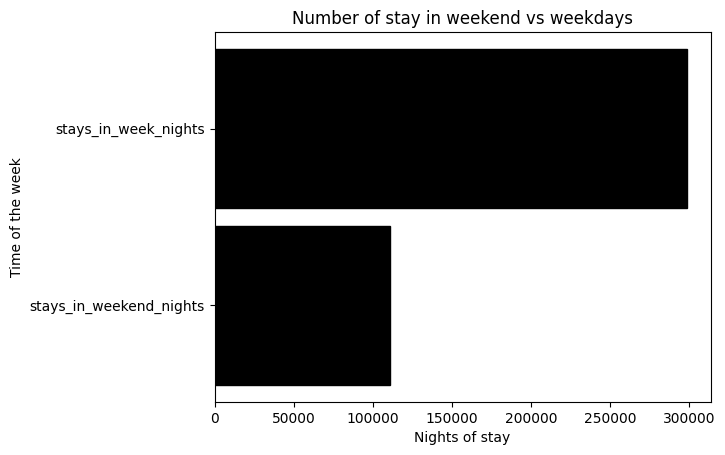

In [46]:
#Plotting number of week night and weekend nights on a bar chart

plt.barh(week_and_weekend_stay['time of week'],week_and_weekend_stay['stays'],color='black',edgecolor='black',height=0.9)
plt.title('Number of stay in weekend vs weekdays')
plt.ylabel('Time of the week')
plt.xlabel('Nights of stay')

 **Observation**

Guests Stays more in week nights than weekend nights.

**Which Hotels has the most repeated guests**

Text(0.5, 1.0, 'Most repeated guests for each hotel')

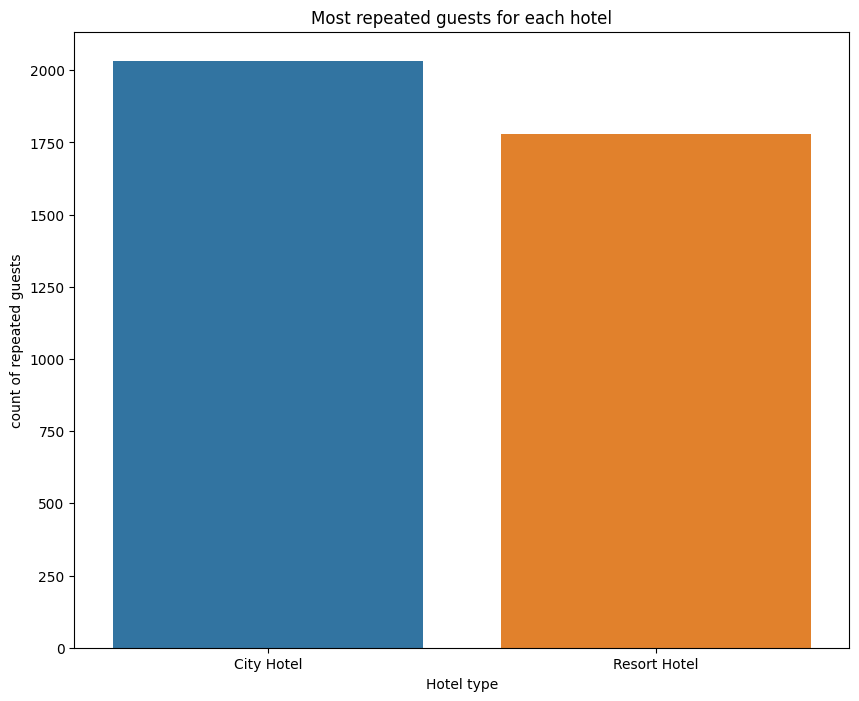

In [47]:
#repeated guest=1
#not repeated guest=0
#groupby hotel.
repeated_guests=hoteldata[hoteldata['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})

#set plot size adn plot barplot.
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests['hotel'],y=repeated_guests['number_of_repated_guests'])

# set labels.
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

**Observation**

Resort Hotel has slightly more repeated guests than the City Hotels. It is almost similar for both hotels.

In order to retained the guests management should take feedbacks from guests and try to imporve the services.

**What is the recommended length of stay for both hotel types**

In [48]:
#group by total stay and hotel.
hoteldata['total_stay'] = hoteldata['stays_in_weekend_nights']+hoteldata['stays_in_week_nights']
grouped_stay = hoteldata.groupby(['total_stay', 'hotel']).agg('count').reset_index()
#take 1st 3 columns
grouped_stay = grouped_stay.iloc[:, :3]
grouped_stay= grouped_stay.rename(columns={'is_canceled':'Number of stays'})
grouped_stay

,total_stay,hotel,Number of stays
0,0,City Hotel,331
1,0,Resort Hotel,384
2,1,City Hotel,13272
3,1,Resort Hotel,7748
4,2,City Hotel,21426
...,...,...,...
71,49,City Hotel,1
72,56,Resort Hotel,2
73,57,City Hotel,1
74,60,Resort Hotel,1


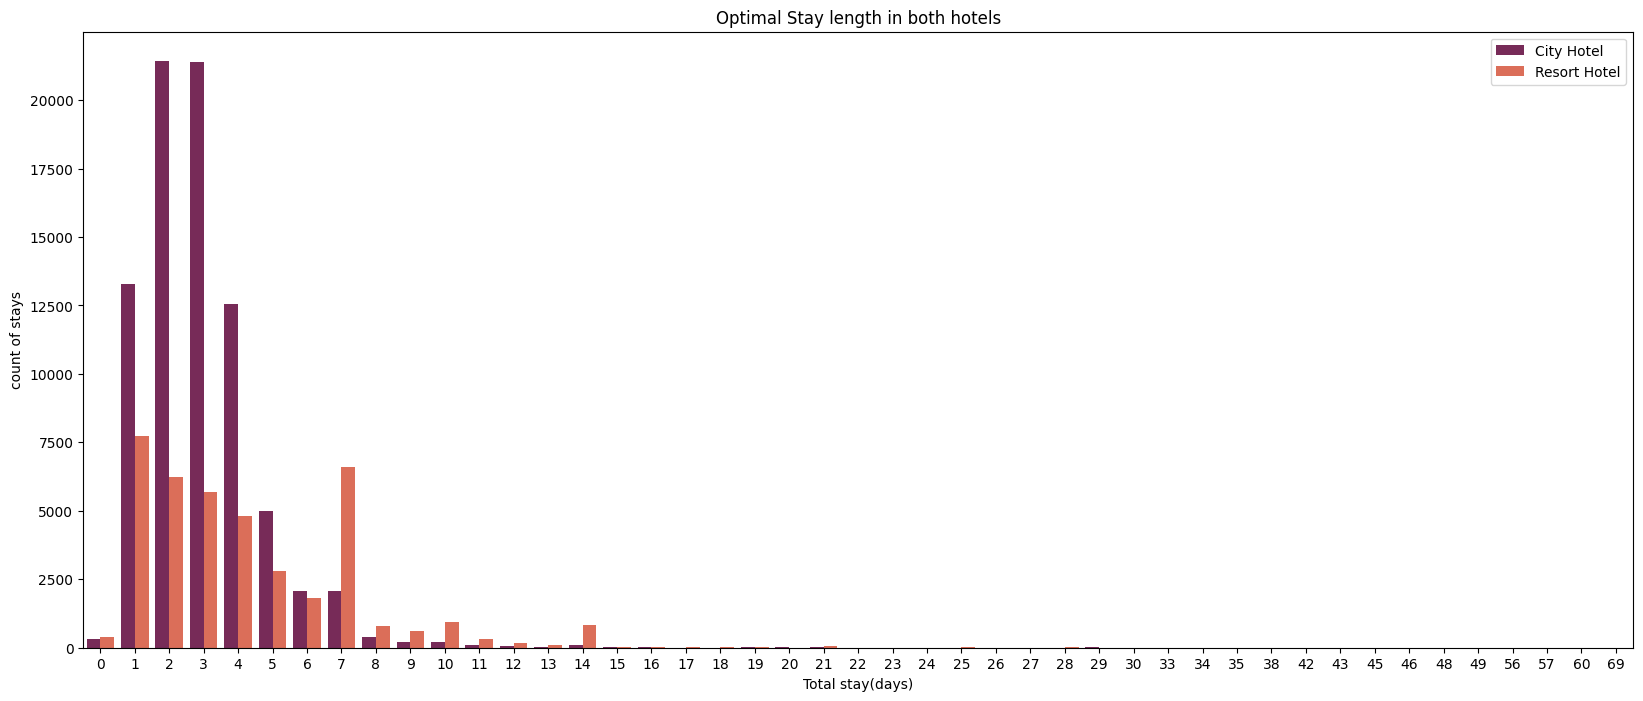

In [49]:
#plot optimal stay length
plt.figure(figsize=(20,8))
sns.barplot(x='total_stay',y='Number of stays',data=grouped_stay,hue='hotel',palette='rocket')

plt.ylabel('count of stays')
plt.xlabel('Total stay(days)')
plt.title('Optimal Stay length in both hotels')
plt.legend(loc='upper right');


 **Observation**

Stay length in both hotels are mostly less than 7 days.


On an average customer preferred to stay 1 to 4 days.


**What is the Avg ADR(Average Daily Rate) of city and resort hotel**

<Axes: title={'center': 'Avg ADR of each Hotel type'}, xlabel='hotel', ylabel='adr'>

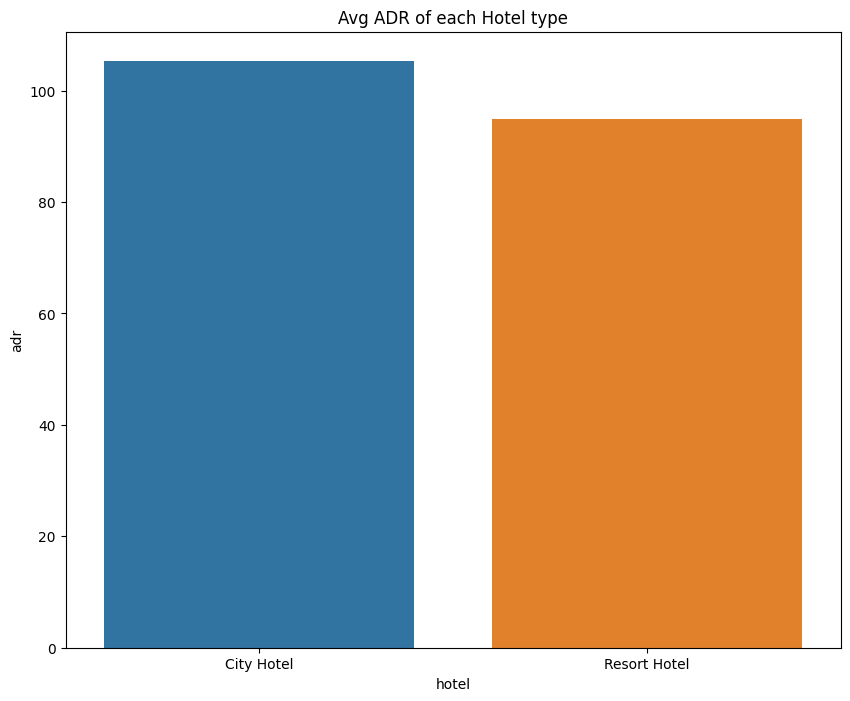

In [50]:
# group by hote.
hotelgrups=hoteldata.groupby('hotel')

#grouping by hotel ADR.
highestadr=hotelgrups['adr'].mean().reset_index()

#set plot size.
plt.figure(figsize=(10,8))

# set labels.
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph.
sns.barplot(x=highestadr['hotel'],y=highestadr['adr'])

**Observation**


City hotel has the highest ADR.

 That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

**What is the ADR(Average Daily Rate) across the different months**

In [51]:
#groupby.
bookings_months=hoteldata.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

#create month list.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_months['arrival_date_month']=pd.Categorical(bookings_months['arrival_date_month'],categories=months,ordered=True)


#sortting.
bookings_months=bookings_months.sort_values('arrival_date_month')

print(bookings_months)

   arrival_date_month         hotel         adr
8             January    City Hotel   82.628986
9             January  Resort Hotel   49.461883
6            February    City Hotel   85.088278
7            February  Resort Hotel   55.171930
15              March  Resort Hotel   57.520147
14              March    City Hotel   92.643116
0               April    City Hotel  111.251838
1               April  Resort Hotel   77.849496
17                May  Resort Hotel   78.758134
16                May    City Hotel  121.638560
13               June  Resort Hotel  110.444749
12               June    City Hotel  119.074341
11               July  Resort Hotel  155.181299
10               July    City Hotel  110.734292
3              August  Resort Hotel  186.790574
2              August    City Hotel  114.680455
22          September    City Hotel  110.004661
23          September  Resort Hotel   93.252030
20            October    City Hotel   99.974498
21            October  Resort Hotel   62

Text(0, 0.5, 'ADR')

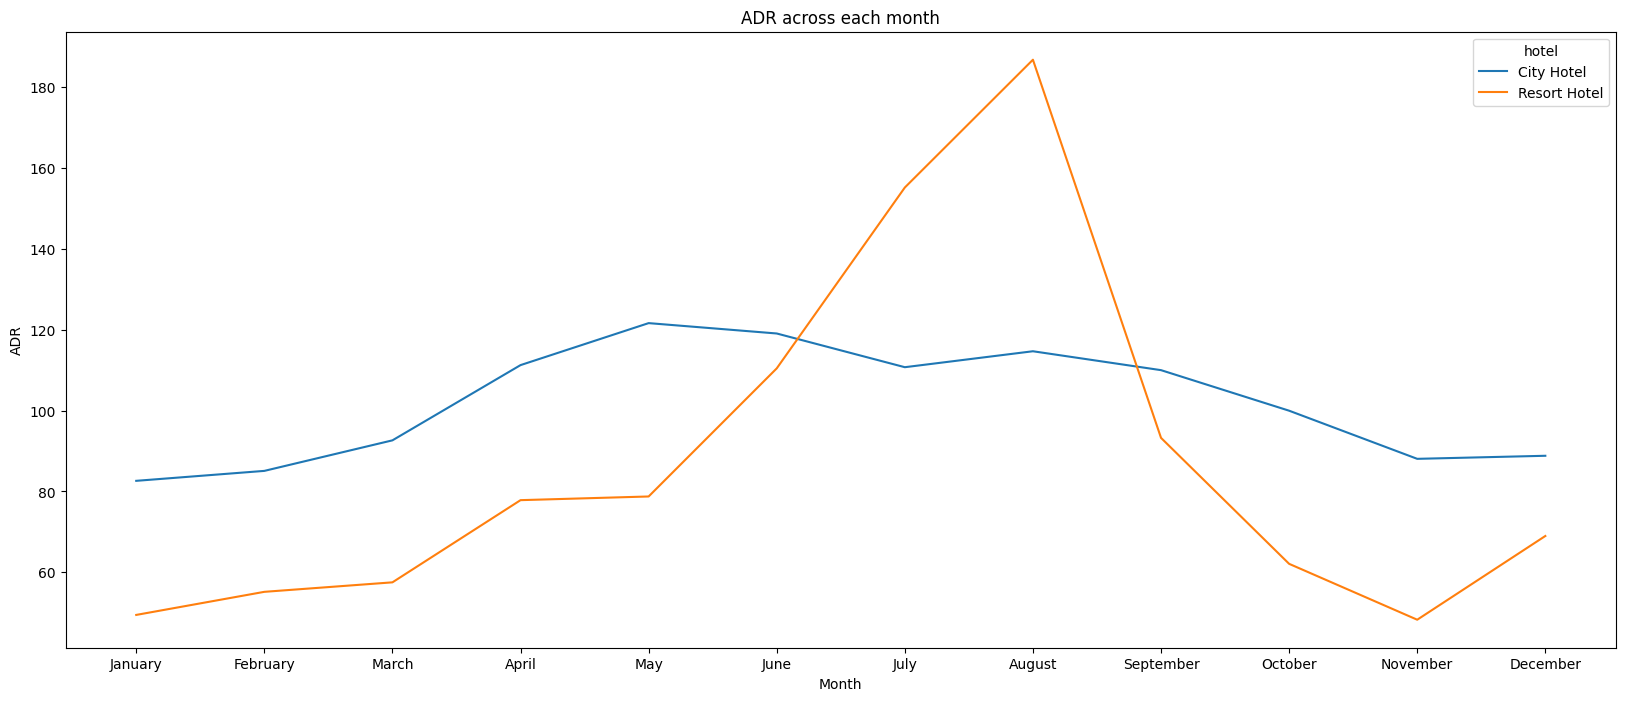

In [52]:
# set plot size and plot the line
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_months['arrival_date_month'],y=bookings_months['adr'],hue=bookings_months['hotel'])

# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

 **Observation**

For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

**Which distribution channel contributed more to ADR(Average Daily rate) in order to increase the the income**

Text(0.5, 1.0, 'ADR across Distribution channel')

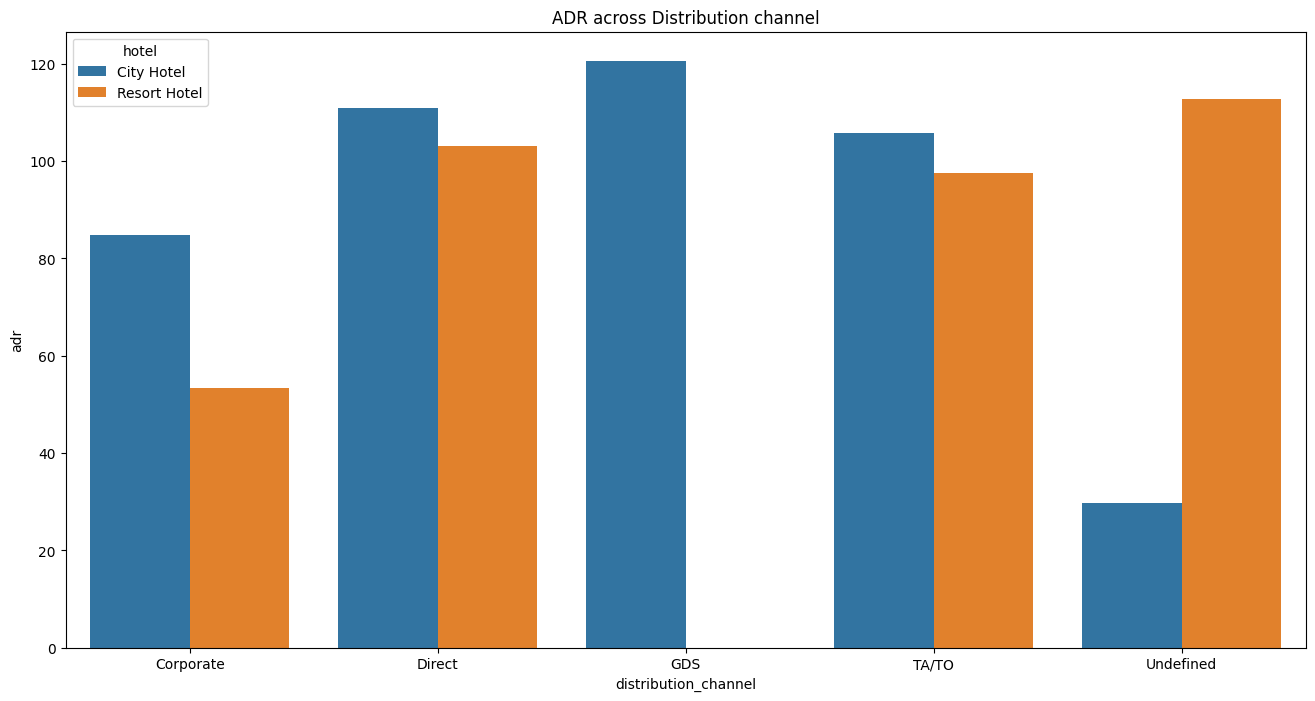

In [53]:
# group by distribution channel and hotel.
distribution_channel_df=hoteldata.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()


# set plot size and plot barchart.
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')


*   Corporate - These are corporate hotel booing companies which makes bookings possible.
*   GDS -A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers.

*  It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.

*  Direct - means that bookings are directly made with the respective hotels
TA/TO- means that booings are made through travel agents or travel operators.
*   Undefined - Bookings are undefined. may be customers made their bookings on arrival.

 **Observation**

From the plot we can observe

'Direct' and 'TA/TO' has almost equally contributed in ADR in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.

GDS has highly contributed in adr in 'City Hotel' type.

GDS needs to increase Resort Hotel bookings.

**What is the ADR(Average Daily Rate) across different market segment**

Text(0.5, 1.0, 'Adr across market segment')

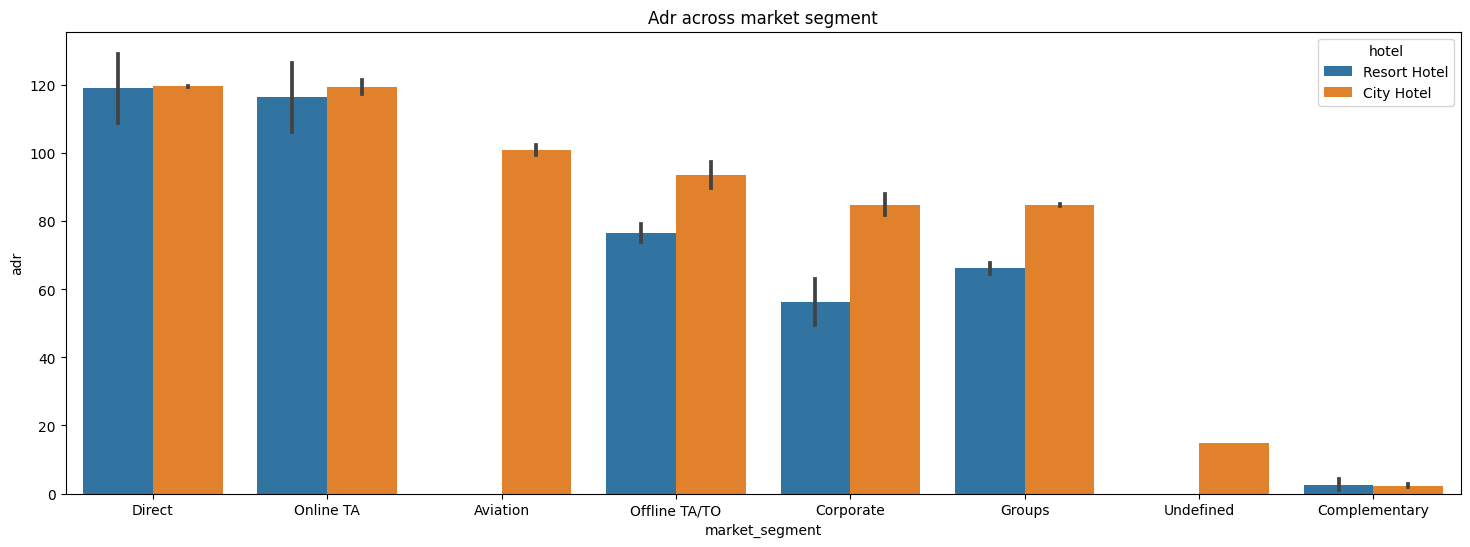

In [54]:
#Group by.
Grupby=hoteldata.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()

# set plot size and plto barchart
plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

 **Obseravtion**

'Direct' and 'Online TA' are contributing the most in both types of hotels.
Aviation segment should focus on increasing the bookings of 'Resort Hotel'.

**How does length of stay affects the ADR(Average Daily Rate**

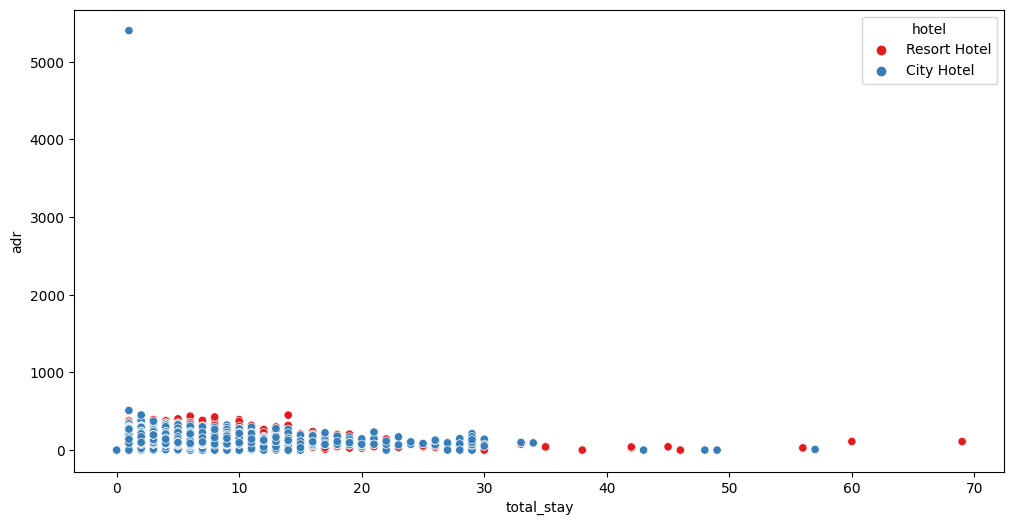

In [55]:
#lets create scatter plot to see relationship between them.
plt.figure(figsize=(12,6))
sns.scatterplot(y= hoteldata['adr'],x= hoteldata['total_stay'],hue =hoteldata['hotel'],palette= 'Set1')
plt.show()

In [56]:
#we can see that because of an outlier our scatterplot is looking messy let's remove that outlier and plot again.
hoteldata.drop(hoteldata[hoteldata['adr'] > 5000].index, inplace = True)

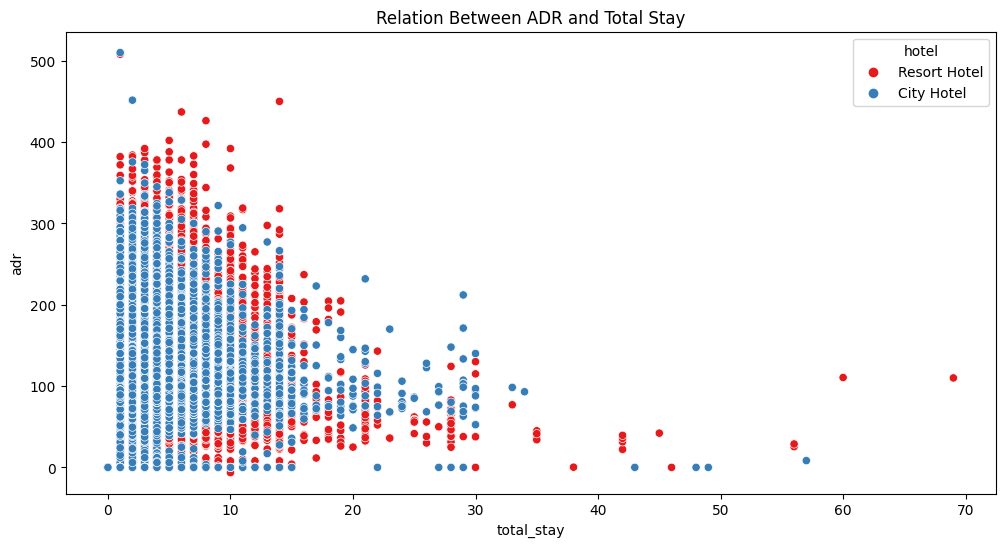

In [57]:
#plot again.
plt.figure(figsize=(12,6))
sns.scatterplot(x=hoteldata['total_stay'],y=hoteldata['adr'],hue=hoteldata['hotel'],palette= 'Set1')
plt.title('Relation Between ADR and Total Stay');

**Observation**

As the total stay increases the ADR(Average Daily Rate) Decreases.

**Which Hotel type has longer waiting time**

          hotel  days_in_waiting_list
0    City Hotel              3.226815
1  Resort Hotel              0.527758


Text(0.5, 1.0, 'Waiting time for each hotel type')

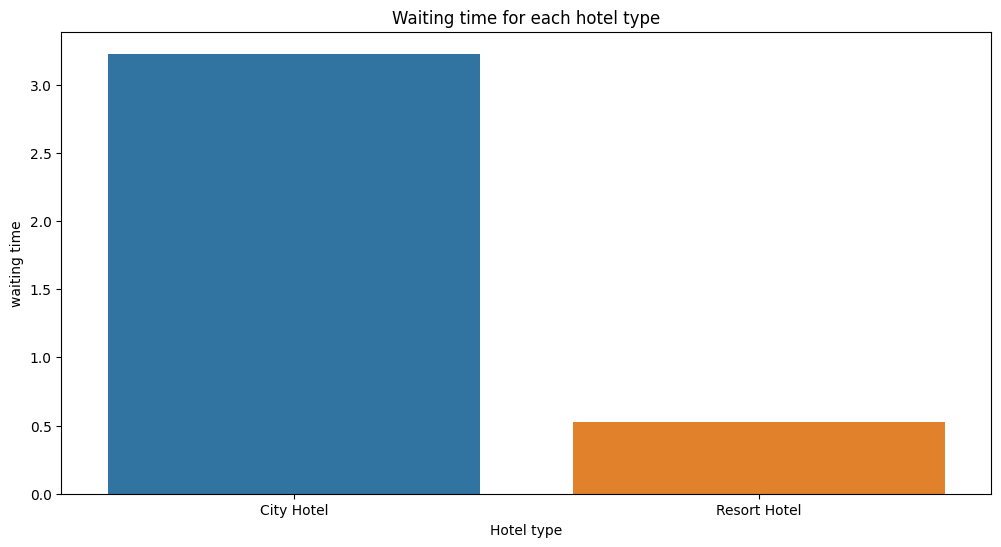

In [58]:
#groupping by hoetl and takin mean of days in waiting list
waitingtime=hoteldata.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
print(waitingtime)
#set the plot size
plt.figure(figsize=(12,6))

# plot barchart
sns.barplot(x=waitingtime['hotel'],y=waitingtime['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

**Observation**

City Hotels has longer waiting period than the Resort Hotel.

**Which Market Segment has the higest cancellation rate**

In [59]:
marketsegment=hoteldata[hoteldata['is_canceled']==1]
marketsegment
marketsegment=marketsegment.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})

print(marketsegment)

   market_segment         hotel  counts
0        Aviation    City Hotel      52
1   Complementary    City Hotel      64
2   Complementary  Resort Hotel      33
3       Corporate    City Hotel     641
4       Corporate  Resort Hotel     351
5          Direct    City Hotel    1056
6          Direct  Resort Hotel     878
7          Groups    City Hotel    9623
8          Groups  Resort Hotel    2474
9   Offline TA/TO    City Hotel    7172
10  Offline TA/TO  Resort Hotel    1138
11      Online TA    City Hotel   14491
12      Online TA  Resort Hotel    6248
13      Undefined    City Hotel       2


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

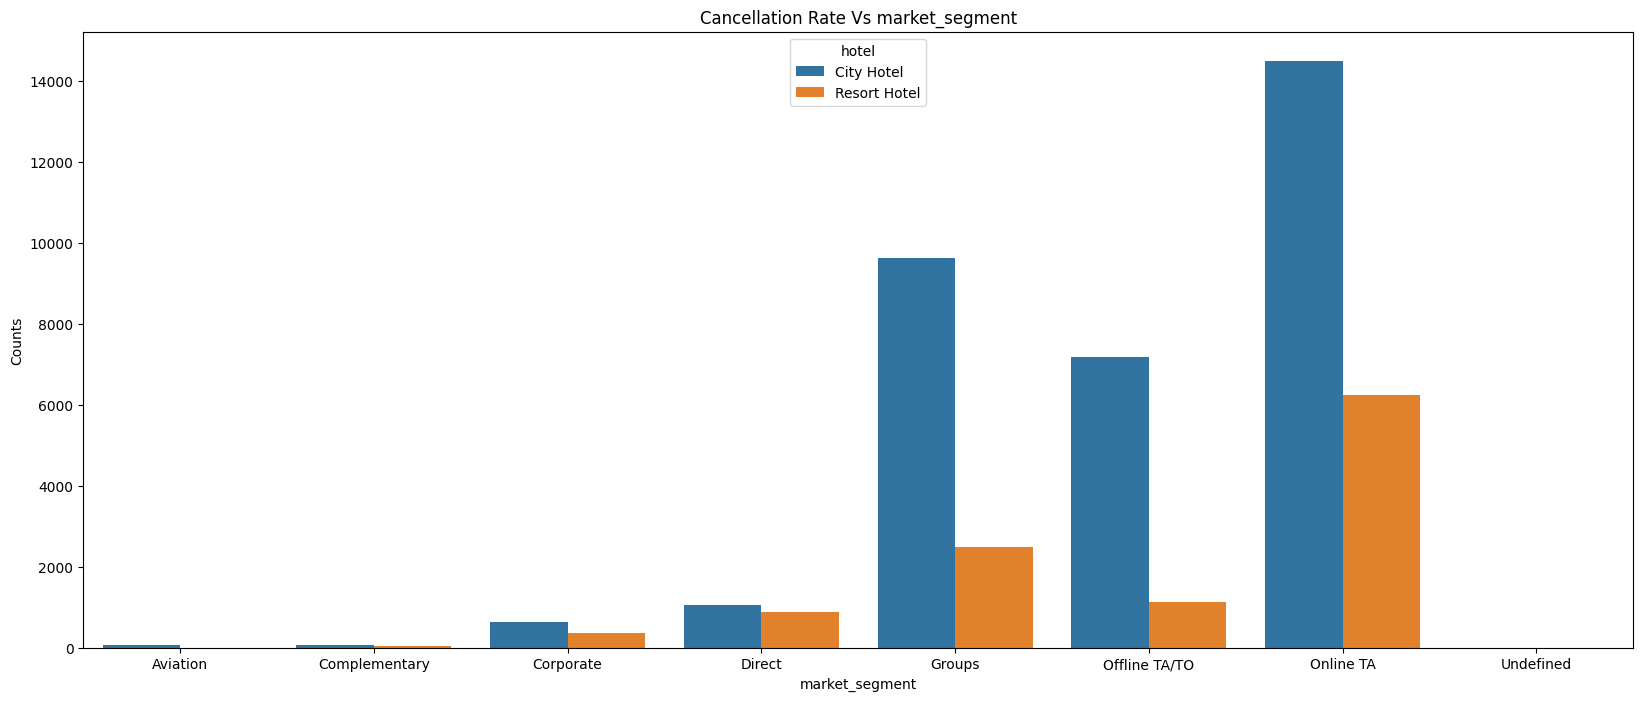

In [60]:
#set plotsizde and plot barchart.
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= marketsegment)

# set labels.
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

 **Observation**


'Online T/A' has the highest cancellation in both type of cities.


**Does the guests alloted with the same room type which was reserved by them**

In [61]:
# Define a function for the reserved room type is same  or not as  assigned room type
def same_room_or_not(x):
  '''function to check whether the reserved room
  type is same  or not as  assigned room type'''

  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0


             percentage
is_canceled            
0             18.778437
1              1.813536


([<matplotlib.axis.XTick at 0x7adc9aa94be0>,
 [Text(0, 0, 'Not canceled'), Text(1, 0, 'canceled')])

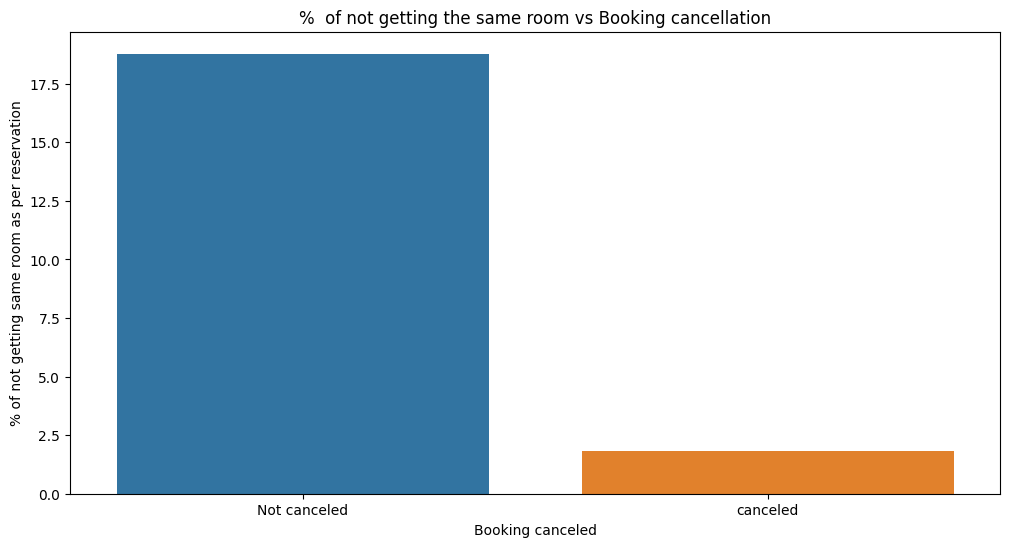

In [62]:
# create new column to hoteldb
hoteldata['Same_room_alloted_or_not']=hoteldata.apply(lambda x: same_room_or_not(x),axis=1)

#groupby is canceled
canceled_data =hoteldata.groupby('is_canceled')

# create DF and calculate  percentage of same room alloted  or not.
DF=pd.DataFrame(canceled_data['Same_room_alloted_or_not'].sum()*100/canceled_data.size()).rename(columns={0:"percentage"})
print(DF)

#set plot size.
plt.figure(figsize=(12,6))
sns.barplot(x=DF.index,y=DF['percentage'])

# set labels
plt.title('%  of not getting the same room vs Booking cancellation')
plt.xlabel('Booking canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['Not canceled','canceled'])

**Obseravtion**

Its is clear that there's not much effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.


**Multivariate Analysis :**

Multivariate analysis is a statistical technique used to analyze and understand the relationships between three or more variables simultaneously. While univariate analysis deals with a single variable and bivariate analysis focuses on the relationship between two variables, multivariate analysis extends the scope to involve multiple variables.

**From the histograms below we can have a brief picture of various column trends**.

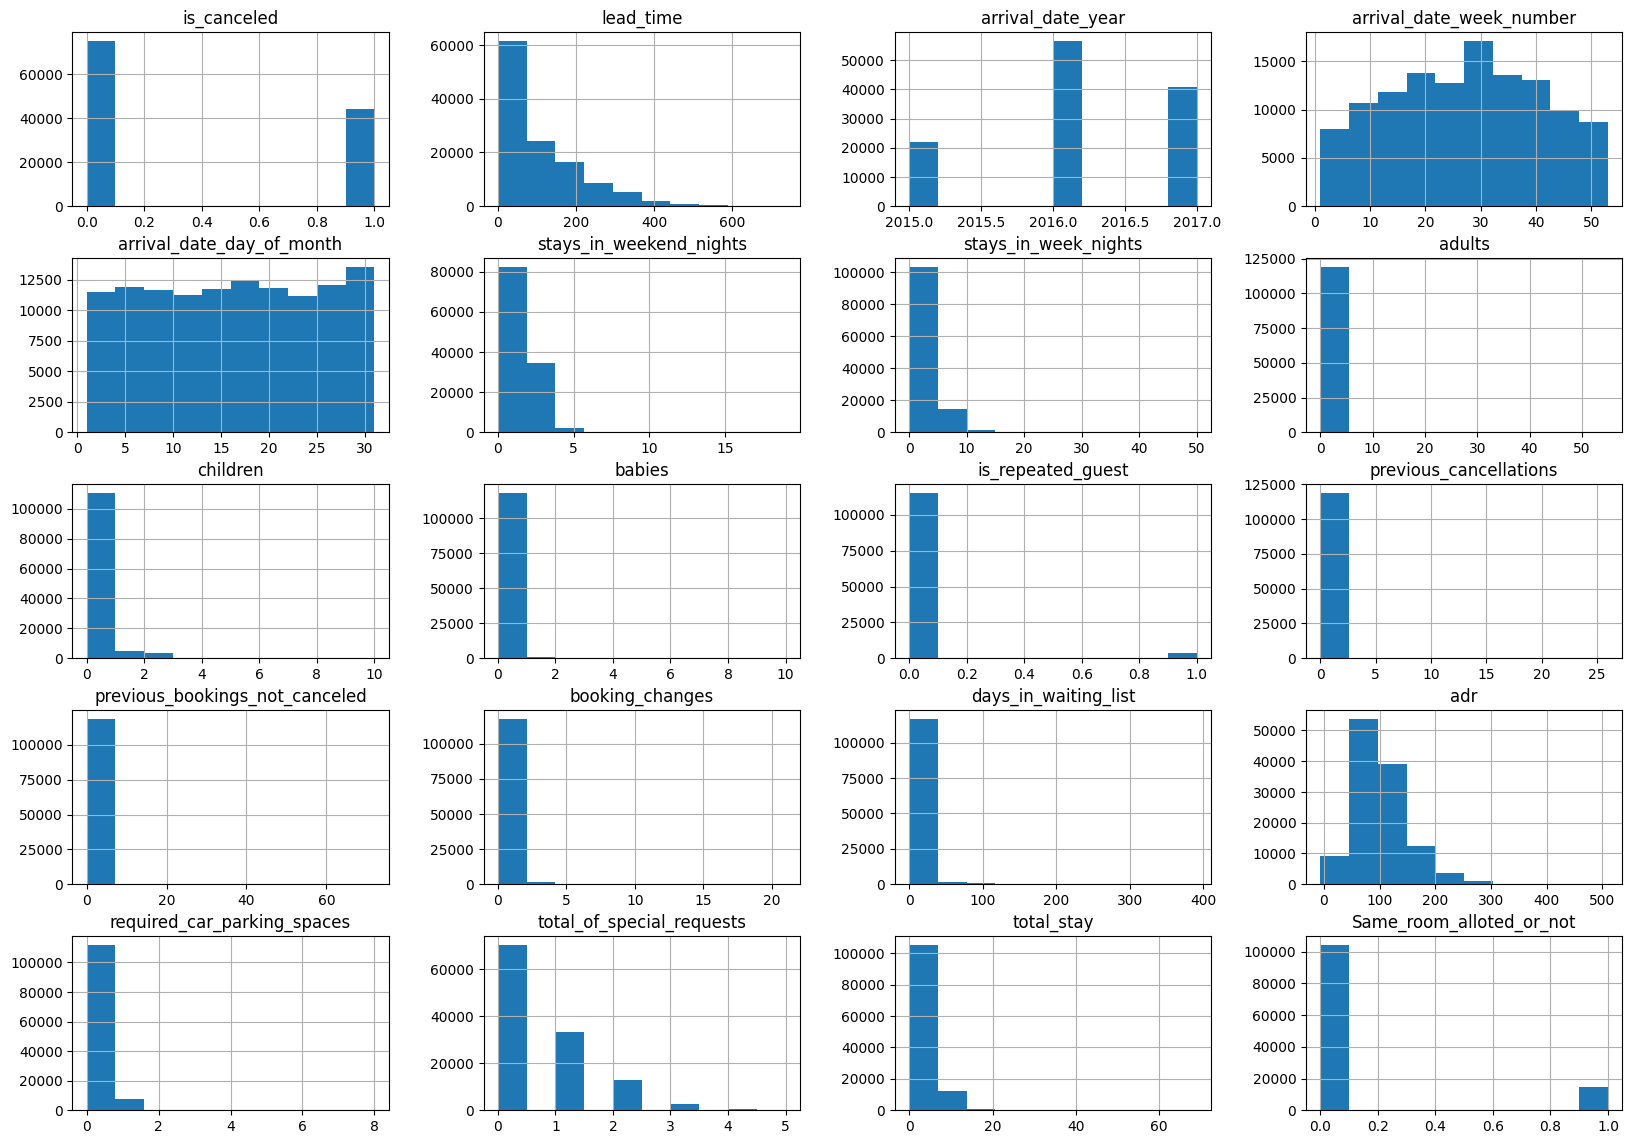

In [63]:
hoteldata.hist(figsize=(20,14))
plt.show()

 **Requirement of car parking spaces year and month wise**

Text(0.5, 0, 'Months')

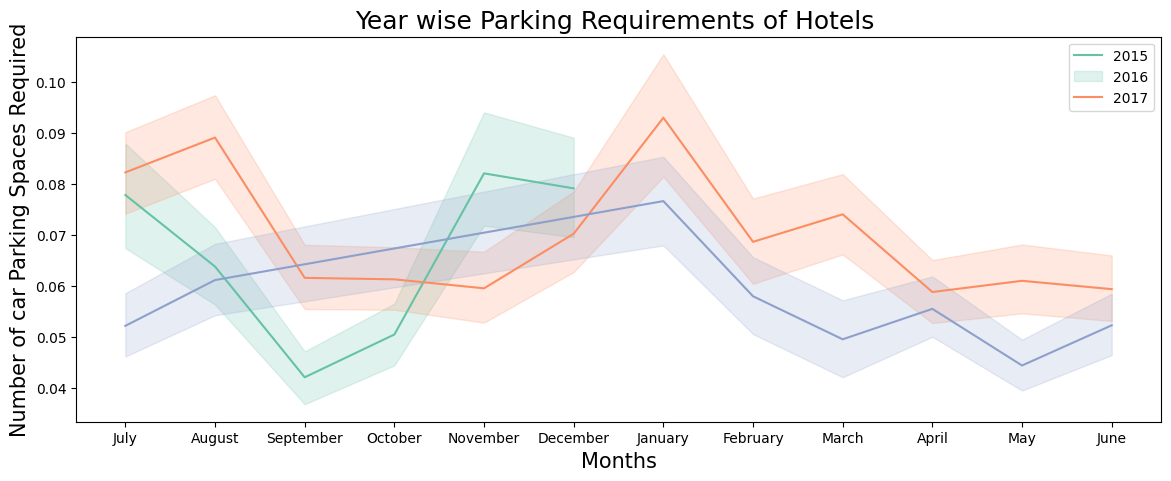

In [64]:
#Creating a line chart to express the relation between the required number of car parking spaces and year by using seaborn

plt.figure(figsize=(14,5))
sns.lineplot(data=hoteldata,x="arrival_date_month", y="required_car_parking_spaces", hue = 'arrival_date_year', palette= 'Set2')
plt.legend(['2015', '2016', '2017'])
plt.title("Year wise Parking Requirements of Hotels ", fontsize = 18)
plt.ylabel("Number of car Parking Spaces Required",fontsize = 15)
plt.xlabel("Months",fontsize = 15)

 **Bookings made through market segments by different countries**

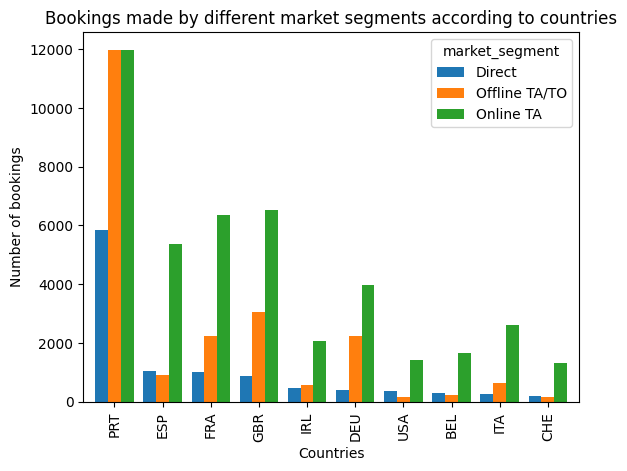

In [65]:
#Plotting bookings made through three main market segments by different countries'

segment_by_country=hoteldata.groupby(['country','market_segment'])['market_segment'].count().unstack().sort_values('Direct',ascending=False).head(10)
segment_by_country[['Direct','Offline TA/TO','Online TA']].plot(kind='bar',width=0.8)
plt.title('Bookings made by different market segments according to countries')
plt.xlabel('Countries')
plt.ylabel('Number of bookings')
plt.rcParams['figure.figsize'] = (12, 8)

 **Correlation of the Columns**

<ipython-input-66-e20948c79c69>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hoteldata.corr(),annot=True)


Text(0.5, 1.0, 'Co-relation of the columns')

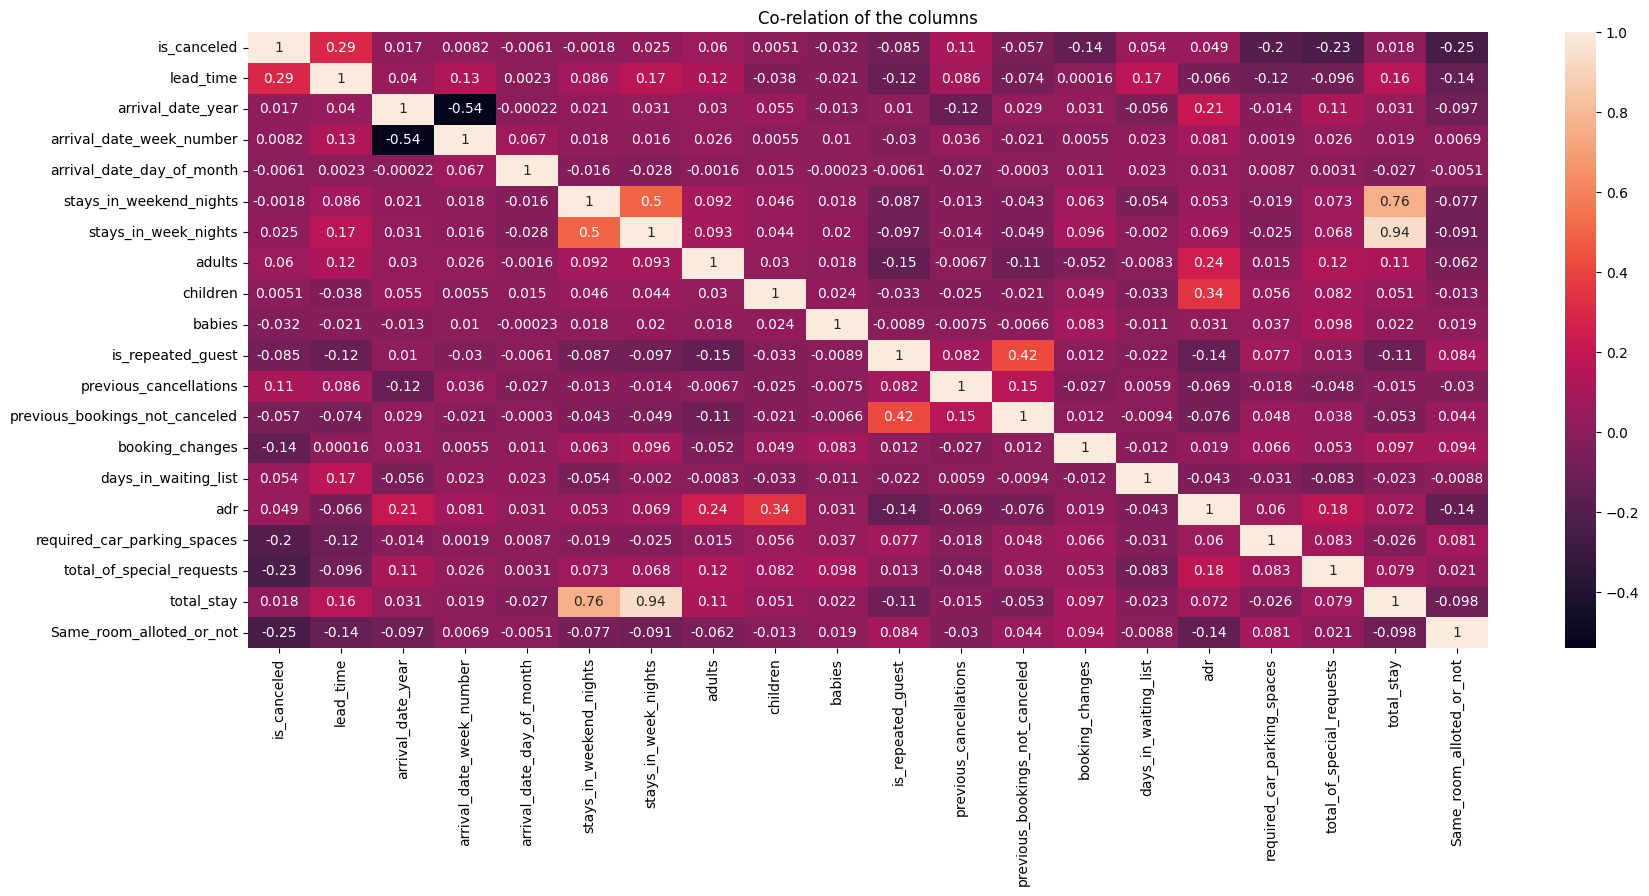

In [66]:
# correlation graph of the data using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(hoteldata.corr(),annot=True)
plt.title('Co-relation of the columns')

 **Correlation Analysis**

In [67]:
corre = hoteldata.corr()
print(corre)

<ipython-input-67-a23a6d6f3377>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre = hoteldata.corr()


                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293133           0.016662   
lead_time                          0.293133   1.000000           0.040141   
arrival_date_year                  0.016662   0.040141           1.000000   
arrival_date_week_number           0.008160   0.126866          -0.540566   
arrival_date_day_of_month         -0.006142   0.002273          -0.000219   
stays_in_weekend_nights           -0.001781   0.085667           0.021496   
stays_in_week_nights               0.024773   0.165796           0.030882   
adults                             0.060015   0.119520           0.029636   
children                           0.005051  -0.037623           0.054624   
babies                            -0.032490  -0.020915          -0.013192   
is_repeated_guest                 -0.084792  -0.124411           0.010341   
previous_cancellations             0.110135   0.086041          -0.119822   

1) Stays in week night and total stay are positively corelated, even more than weekend nights which says, longer stays are in week time only.

2) lead_time and total_stay is positively corelated. That means more is the stay of customer more will be the lead time.

3) Total people, total stay and ADR has positive correlation which means more the people, longer the stay will give more revenue.

4) is_repeated guest and previous bookings not canceled has strong correlation. may be repeated guests are not more likely to cancel their bookings.

5) adults and lead time a positively corelated which means more the adults more the lead time

6) children and lead time a re negatively co-related means more the children lesser the lead time.

7) ADR and children are very positively corelated, which states more the children more is the revenue.

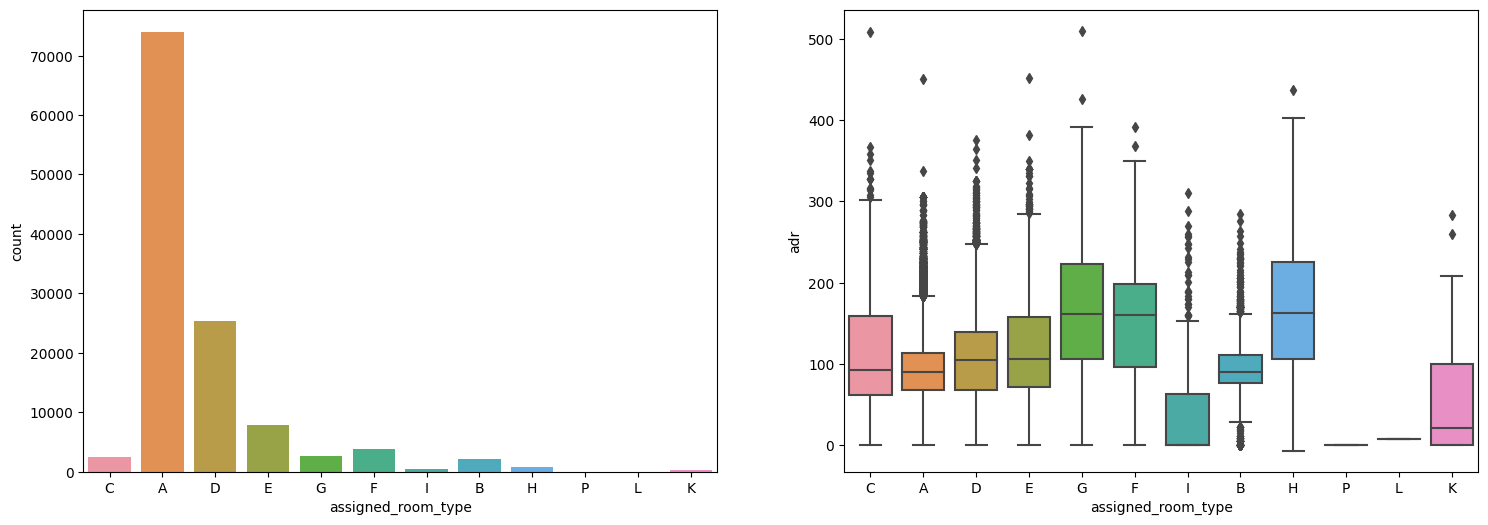

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

grp_room = hoteldata.groupby('assigned_room_type')
hoteldata['Num_of_bookings'] = grp_room.size()

#plotting in demand room
sns.countplot(ax = axes[0], x = hoteldata['assigned_room_type'])
#plotting high adr genrating room
sns.boxplot(ax = axes[1], x = hoteldata['assigned_room_type'], y = hoteldata['adr'])
plt.show()

## **CONCLUSION**

After careful analysis , we can conclude that the hotel industry can benefit a lot by studying the type of customers, their booking mode, the booking month and the seasons. The hotel industry market, their ADR and bookings are based on the type of customers,the month, types of meal, hotel type ,their country of origin, Room types, booking medium and many others.

## **SUGGESTIONS**

1.The hotel industry can take the advantage of seasons and months as ADR was highest in august (rainy season).

2.Most customers booked rooms online so they can be targeted with proper seasonal discounts and vacay-ads.

3.Since ADR was least during Nov and Jan, winter discounts(assumption) or off season discounts might help.

4.For retention, they should introduce portugese meals(sea foods and meat) and eastern european meals as guests are more from there.

5.They should encourage direct bookings by offering some special discounts as online bookings cancellation is high.

6.Since room A is booked more, they should take into account the factors how it is different from other rooms and implement the same in other rooms as well.


7.Since resort hotels are less preferred, they should look into the factors- might be High cost or guests requirements.